## A Basic Machine Learning Model should follow the below steps to train a model.
### 1.Problem Definition:
* To predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
### 2.Data:
* The Data is obtained from "http://bit.ly/w-data"
### 3.Evaluation:
* The Evaluation metrics for this project is MEan Absolute Error(MAE) and Mean Squared Error(MSE)
### 4.Features:
*  The Dataset has "Hours" as features and "Scores" as labels
### 5.Modelling:
* The Dataset is modelled on Linear Regression
### 6.Experimentaion:
* Trying out other models to better optimise the results or trying out various Hyperparameters for tuning our model,since we got a very good output we don't need to further tune our model.

### An End-to-End workflow of a Supervised Learning Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data
The Data is obtained from "http://bit.ly/w-data"

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Feature observation and Creating a comparison plot of the two columns

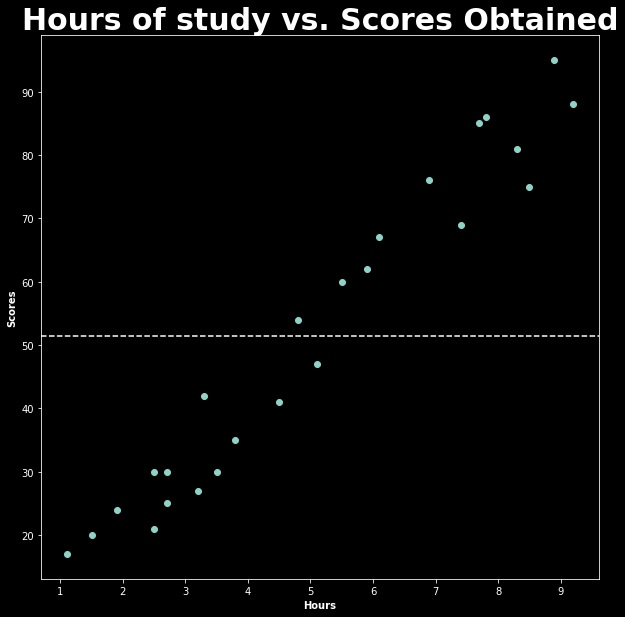

In [3]:
plt.style.use("dark_background")
plt.figure(figsize=(10,10))
plt.scatter(x=data["Hours"],y=data["Scores"])
#making it more readable
plt.title("Hours of study vs. Scores Obtained",fontweight="bold",fontsize=30)
plt.xlabel("Hours",fontsize=10,fontweight="bold")
plt.ylabel("Scores",fontsize=10,fontweight="bold")
plt.axhline(data["Scores"].mean(),linestyle="--")

From the above graph we observe that there is surely a linar relationship between Hours of Study and Marks obtained, so we can apply Linear Regression to our data to train the model

### Evaluation of the Data set 

In [4]:
#Lets split the data into features and labels
X=data.iloc[:, :-1].values  
y=data.iloc[:, 1].values 

In [5]:
#Let's split the data into training and testing data sets
np.random.seed(50)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Modelling

In [6]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9710141413299419

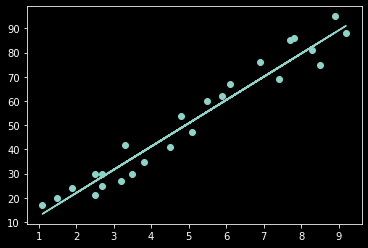

In [7]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [10]:
#Make a prediction
y_preds=model.predict(X_test)
y_preds

array([88.21139357, 28.71845267, 69.02012231, 39.27365186, 13.36543566])

In [11]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds})  
df 

,Actual,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


In [12]:
y_test,X_test

(array([95, 30, 76, 35, 17], dtype=int64),
 array([[8.9],
        [2.7],
        [6.9],
        [3.8],
        [1.1]]))

In [34]:
# Predicting on our own data
hours = ([[9.25]])
test_own= model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(test_own[0]))

No of Hours = [[9.25]]
Predicted Score = 91.56986604454477


### Experimentation
### Method to evaluate our model
There are a number of methods to evaluate a Regression Problem.
* R^2
* Mean Absolute Error(MAE)
* Mean Squared Error(MSE)

In [30]:
#1.R^2 method
model.score(X_test,y_test)

0.9710141413299419

In [31]:
#2.Mean Absolute Error(MAE)
from sklearn.metrics import mean_absolute_error
MAA=mean_absolute_error(y_test,y_preds)
MAA

4.5916495300630285

In [32]:
#3.Mean Squared Error(MSE)
from sklearn.metrics import mean_squared_error
X_preds=model.predict(X_test)
MSE=mean_squared_error(y_test,X_preds)
MSE

25.58407829653998